# Problem Definition: In this dataset we have to predict if the client will subscribe a term deposite or not.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on
phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) 
would be ('yes') or not ('no') subscribed.

# Variables used in data

   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   #other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

 # Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")




In [1]:
# Importing Pandas Library and warnings
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Loaging dataset

In [2]:
df=pd.read_csv("Bank_marketing.csv",sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Data Exploration

In [3]:
# Checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.shape       # Checking shape of dataset

(45211, 17)

Observation: Dataset has rows=45211 and column=17                   

In [5]:
# Checking various columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
# Checking datatypes of dataset
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Observation: Categorical Features= job, marital, education, default, housing, loan, contact, month, poutcome, y.
             Numerical Features= age, balance, day, duration,campaign, pdays, previous.

In [7]:
# Checking Null Values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Observation: No Null values present in dataset.
             But some features having unknown values as we seen before in data. 

In [8]:
# Checking value counts for each feature 
for i in df.columns:
    print(df[i].value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular    

Observation : unknown values present in job, education, contact, poutcome.
              so first we need to convert it into NaN and then impute that values.

In [9]:
# converting unknown values to NaN.
import numpy as np
df=df.replace('unknown',np.NaN)

In [10]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [11]:
from sklearn.impute import SimpleImputer

In [12]:
imp=SimpleImputer(strategy="most_frequent")

In [13]:
# Imputing null values 
list=['job','education','contact','poutcome']
for i in list:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
    

In [14]:
# Checking null values after imputing
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Observation: No null values present in dataset

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no


In [16]:
# Statistical Description of numeric features.
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [17]:
# Checking Statistical correlation 
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [18]:
# Checking value counts
for i in df.columns:
    print(df[i].value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     42305
telephone     2906
Name

In [19]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,no


# Checking Value counts for categorical features

In [20]:
df['poutcome'].value_counts()

failure    41860
other       1840
success     1511
Name: poutcome, dtype: int64

In [21]:
df['education'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

In [22]:
df['contact'].value_counts()

cellular     42305
telephone     2906
Name: contact, dtype: int64

In [23]:
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

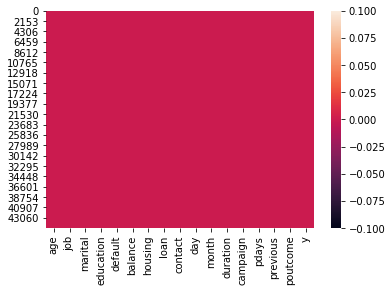

In [24]:
# Checking Null values using visualization(heatmap).
import seaborn as sns
sns.heatmap(df.isnull())

# Data Visualization

# Univariate Analysis

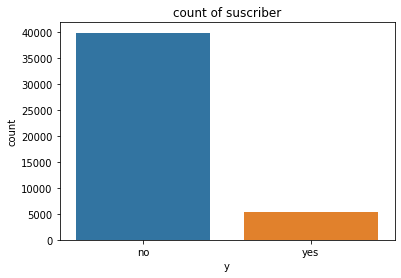

no     39922
yes     5289
Name: y, dtype: int64


In [25]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(25,10))
sns.countplot(x='y', data=df)
plt.title("count of suscriber")
plt.show()
print(df['y'].value_counts())

Observation: Suscriber count is 5289 only and non-suscriber count is high i.e 39922.

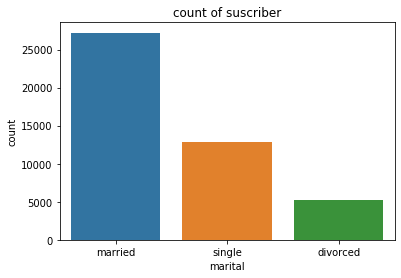

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


In [26]:
sns.countplot(x='marital', data=df)
plt.title("count of suscriber")
plt.show()
print(df['marital'].value_counts())

Observation: Married count is high comparatively single marital and divorced.
             Married count is 27214
             Single marital count is 12790
             Divorced count is 5207

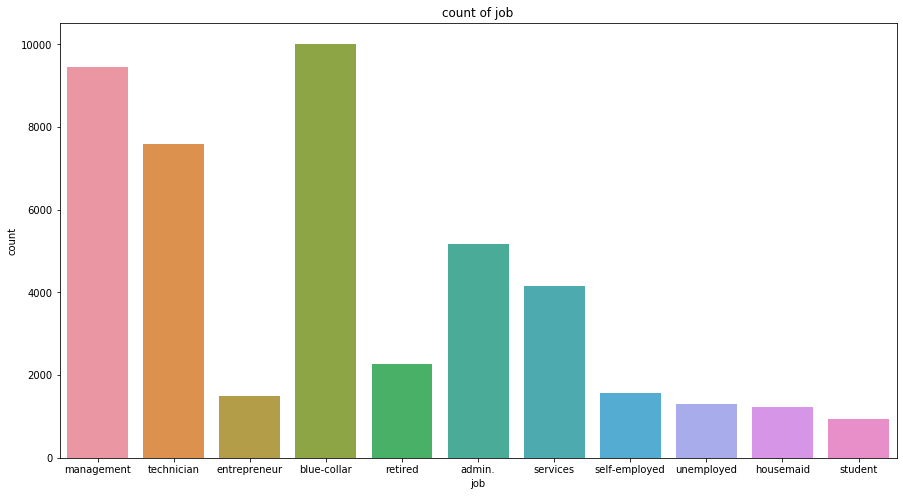

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64


In [27]:
plt.figure(figsize=(15,8))
sns.countplot(x='job', data=df)
plt.title("count of job")
plt.show()
print(df['job'].value_counts())

Observation:  Blue-collar job has maximum count and minimum count is for students.
              blue-collar      10020
              management        9458
              technician        7597
              admin             5171
              services          4154
              retired           2264
              self-employed     1579
              entrepreneur      1487
              unemployed        1303
              housemaid         1240
              student            938

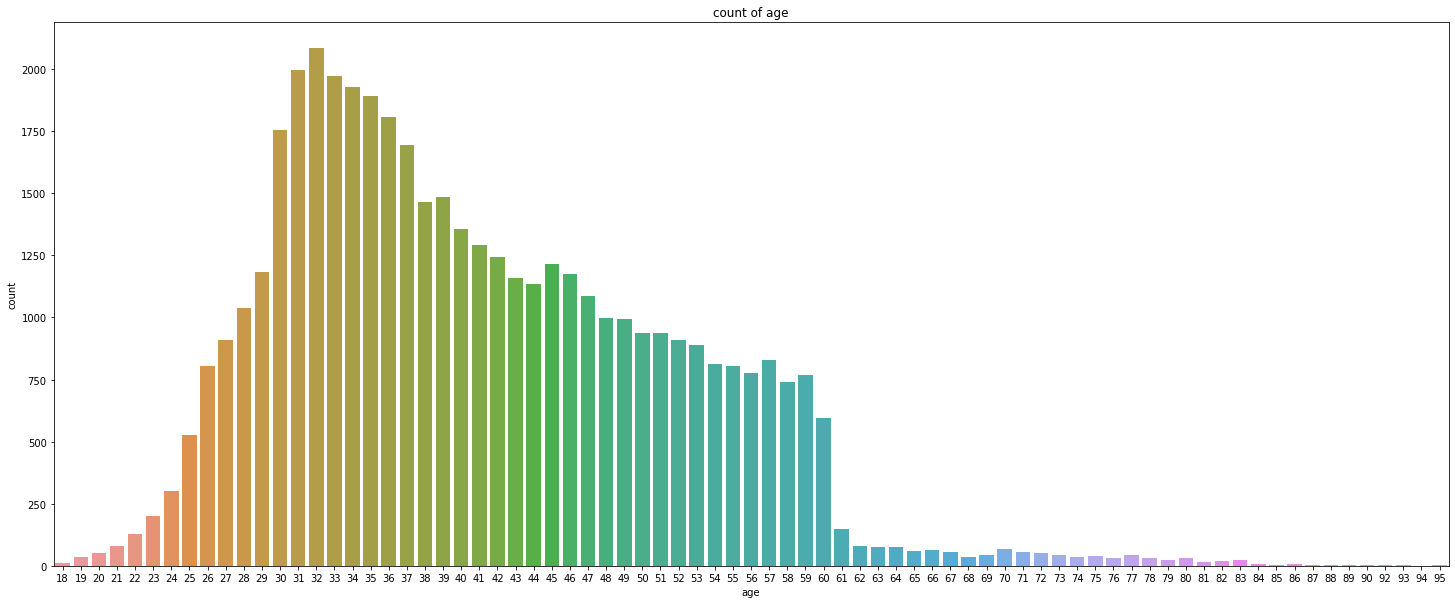

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64


In [28]:
plt.figure(figsize=(25,10))
sns.countplot(x='age', data=df)
plt.title("count of age")
plt.show()
print(df['age'].value_counts())

Observation: Age count is maximum for 32 years is 2085.
             And minimum count is for 94 years is 1.         

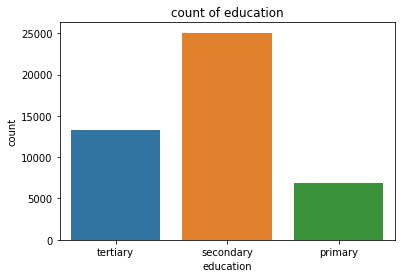

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64


In [29]:
#plt.figure(figsize=(25,10))
sns.countplot(x='education', data=df)
plt.title("count of education")
plt.show()
print(df['education'].value_counts())

Observation : Maximum count is for secondary education = 25059
              tertiary count = 13301
              primar count=6851

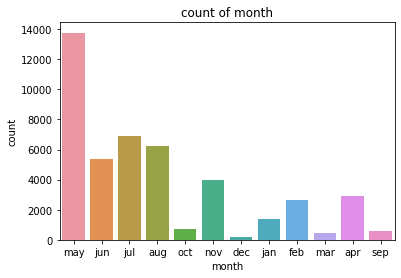

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


In [30]:
#plt.figure(figsize=(25,10))
sns.countplot(x='month', data=df)
plt.title("count of month")
plt.show()
print(df['month'].value_counts())

Observation : May month has maximum count = 13766
              December month has minimum count = 214

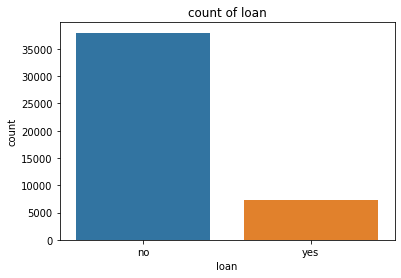

no     37967
yes     7244
Name: loan, dtype: int64


In [31]:
#plt.figure(figsize=(25,10))
sns.countplot(x='loan', data=df)
plt.title("count of loan")
plt.show()
print(df['loan'].value_counts())

Observation : loan count yes = 7244 and no = 37967

In [32]:
df['y'][df['age']>60].value_counts()

no     686
yes    502
Name: y, dtype: int64

Observation: age greater than 60 having suscribers are 502.

In [34]:
from sklearn.preprocessing import LabelEncoder       # converting string data to numerical
le=LabelEncoder()

list1=['job','marital','education','default','housing','loan','contact','month','poutcome','y']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,0,5,8,261,1,-1,0,0,0
1,44,9,2,1,0,29,1,0,0,5,8,151,1,-1,0,0,0
2,33,2,1,1,0,2,1,1,0,5,8,76,1,-1,0,0,0
3,47,1,1,1,0,1506,1,0,0,5,8,92,1,-1,0,0,0
4,33,1,2,1,0,1,0,0,0,5,8,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,0,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,0,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,0,0


# Bivariate Analysis

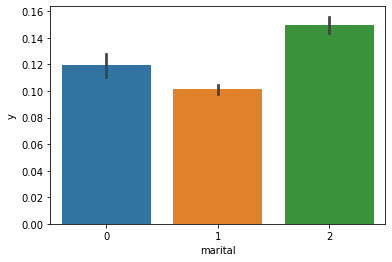

marital  y
0        0     4585
         1      622
1        0    24459
         1     2755
2        0    10878
         1     1912
Name: y, dtype: int64
1    27214
2    12790
0     5207
Name: marital, dtype: int64


In [35]:
#plt.figure(figsize=(25,10))
sns.barplot(x='marital',y='y',data=df)
plt.show()
print(df.groupby('marital')['y'].value_counts())
print(df['marital'].value_counts())

Observation : 2-single - 10878 are non-suscriber and 1912 are suscribers.
              1-married - 24459 are non-suscriber and 2755 are suscribers.
              0-divorced - 4585 are non-suscriber and 622 are suscribers.

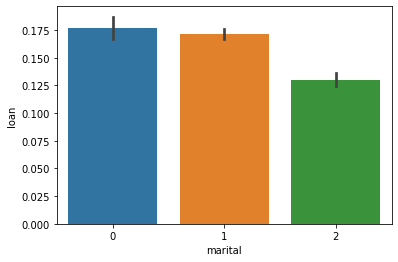

marital  loan
0        0        4286
         1         921
1        0       22554
         1        4660
2        0       11127
         1        1663
Name: loan, dtype: int64


In [36]:
sns.barplot(x='marital',y='loan',data=df)
plt.show()
print(df.groupby('marital')['loan'].value_counts())

Observation: 0 - Divorced peoples not having loan is = 4286 and peoples having loan = 921
             1 - Married  peoples not having loan is = 22554 and peoples having loan = 4660
             2 - Single peoples not having loan is = 11127   and peoples having loan = 1663

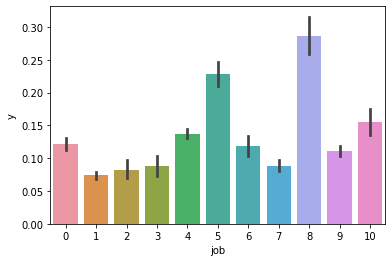

job  y
0    0    4540
     1     631
1    0    9278
     1     742
2    0    1364
     1     123
3    0    1131
     1     109
4    0    8157
     1    1301
5    0    1748
     1     516
6    0    1392
     1     187
7    0    3785
     1     369
8    0     669
     1     269
9    0    6757
     1     840
10   0    1101
     1     202
Name: y, dtype: int64


In [37]:
sns.barplot(x='job',y='y',data=df)
plt.show()
print(df.groupby('job')['y'].value_counts())

Observation : 4 has maximum 1301 count of suscribers.
              And 1 has maximum 9278 count of non-suscribers.

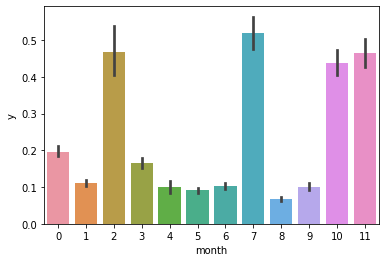

month  y
0      0     2355
       1      577
1      0     5559
       1      688
2      0      114
       1      100
3      0     2208
       1      441
4      0     1261
       1      142
5      0     6268
       1      627
6      0     4795
       1      546
7      1      248
       0      229
8      0    12841
       1      925
9      0     3567
       1      403
10     0      415
       1      323
11     0      310
       1      269
Name: y, dtype: int64


In [38]:
sns.barplot(x='month',y='y',data=df)
plt.show()
print(df.groupby('month')['y'].value_counts())

The contact rate is the highest in may and august and on other hand, the highest subscription rate occured
in march, september and october

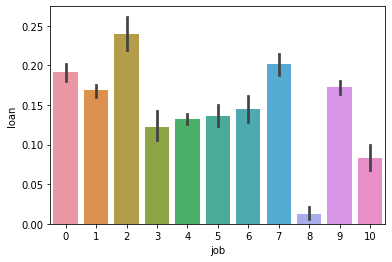

job  loan
0    0       4180
     1        991
1    0       8332
     1       1688
2    0       1131
     1        356
3    0       1088
     1        152
4    0       8205
     1       1253
5    0       1955
     1        309
6    0       1350
     1        229
7    0       3318
     1        836
8    0        926
     1         12
9    0       6288
     1       1309
10   0       1194
     1        109
Name: loan, dtype: int64


In [39]:
sns.barplot(x='job',y='loan',data=df)
plt.show()
print(df.groupby('job')['loan'].value_counts())

Observation : 9 has maximum count of having loan = 1309.
              And 1 has maximum count of not having loan = 8332

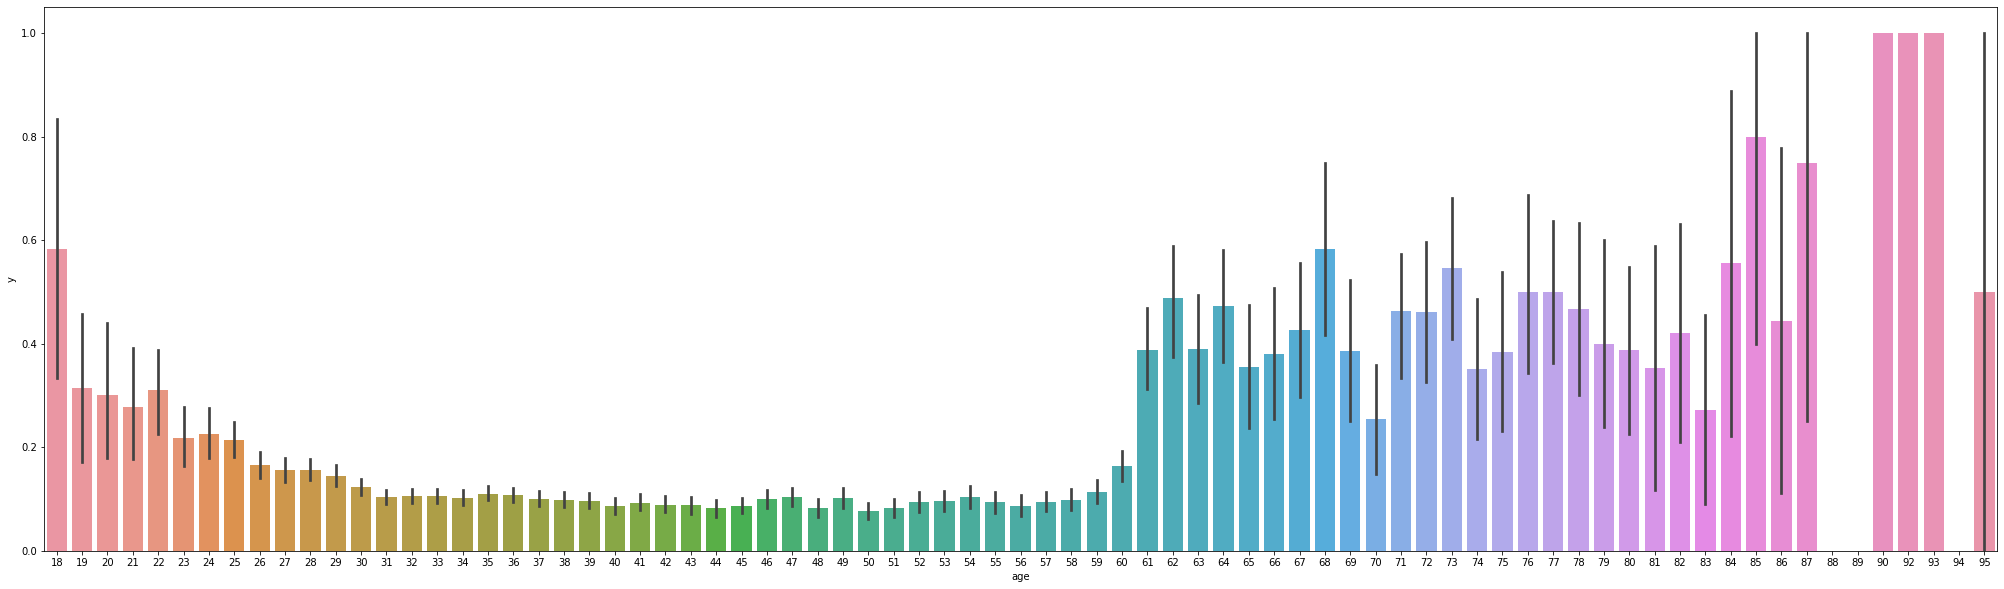

age  y
18   1     7
     0     5
19   0    24
     1    11
20   0    35
          ..
92   1     2
93   1     2
94   0     1
95   0     1
     1     1
Name: y, Length: 148, dtype: int64


In [40]:
plt.figure(figsize=(35,10))
sns.barplot(x='age',y='y',data=df)
plt.show()
print(df.groupby('age')['y'].value_counts())

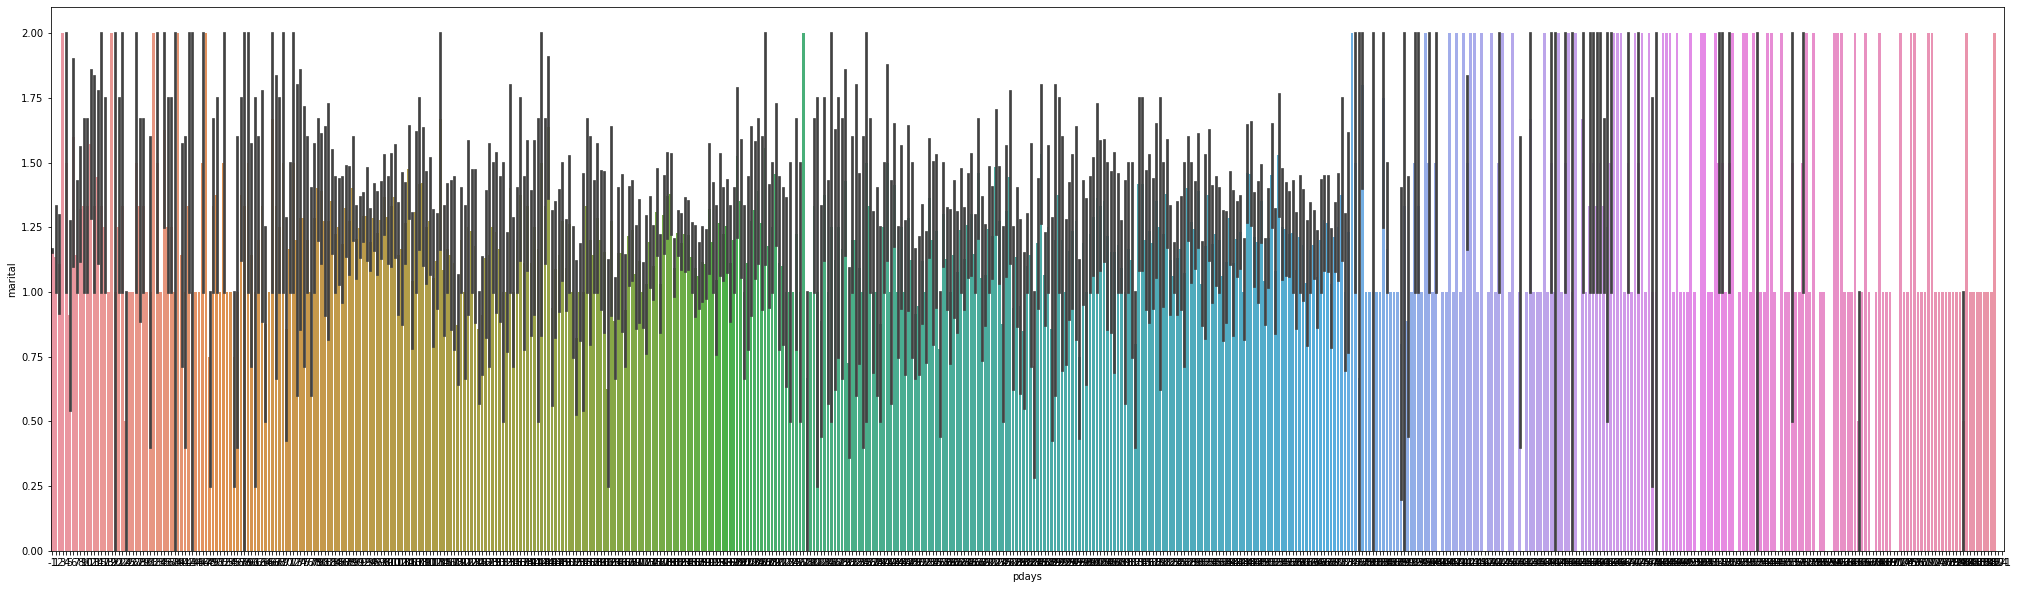

pdays  marital
-1     1          22469
       2          10209
       0           4276
 1     1             13
       2              2
                  ...  
 838   1              1
 842   1              1
 850   2              1
 854   0              1
 871   0              1
Name: marital, Length: 1232, dtype: int64


In [41]:
plt.figure(figsize=(35,10))
sns.barplot(x='pdays',y='marital',data=df)
plt.show()
print(df.groupby('pdays')['marital'].value_counts())

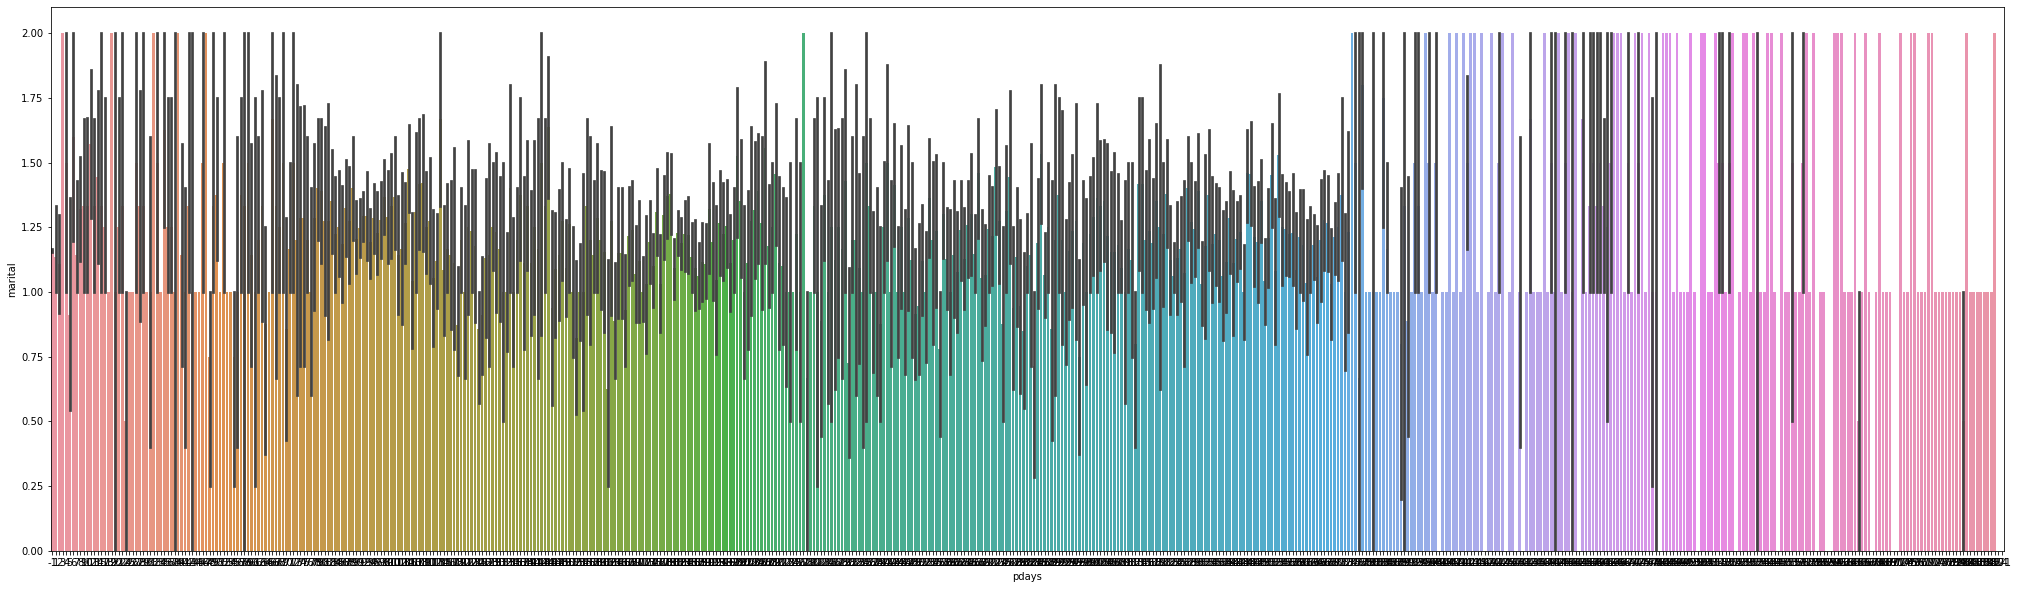

pdays  marital
-1     1          22469
       2          10209
       0           4276
 1     1             13
       2              2
                  ...  
 838   1              1
 842   1              1
 850   2              1
 854   0              1
 871   0              1
Name: marital, Length: 1232, dtype: int64


In [42]:
plt.figure(figsize=(35,10))
sns.barplot(x='pdays',y='marital',data=df)
plt.show()
print(df.groupby('pdays')['marital'].value_counts())

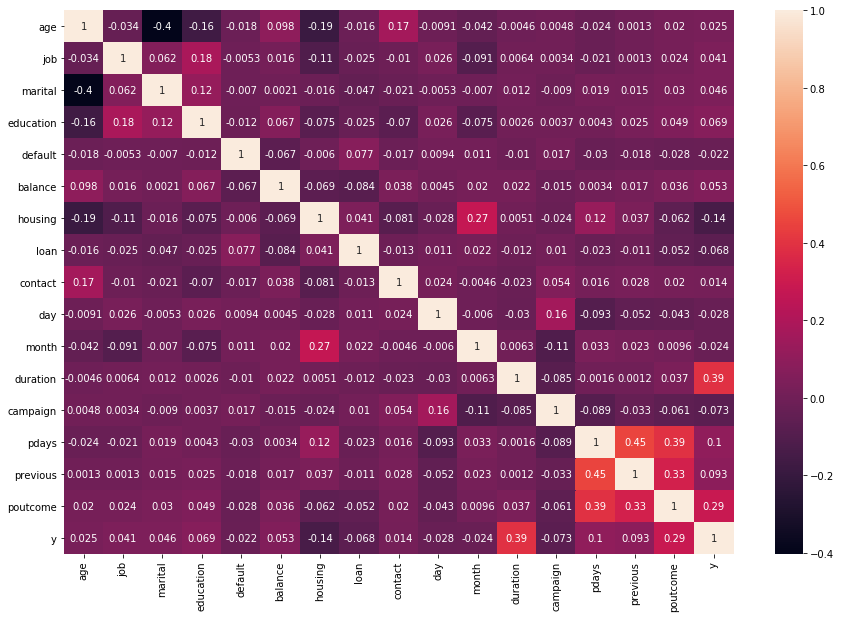

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

Observation : Housing, Month, Campaign, Default is negatively correlated  with target.
              Duration, poutcome, pdays, previous, education, balance, marital, job are highly correlated.

Text(0.5, 1.0, 'correlation with target variable')

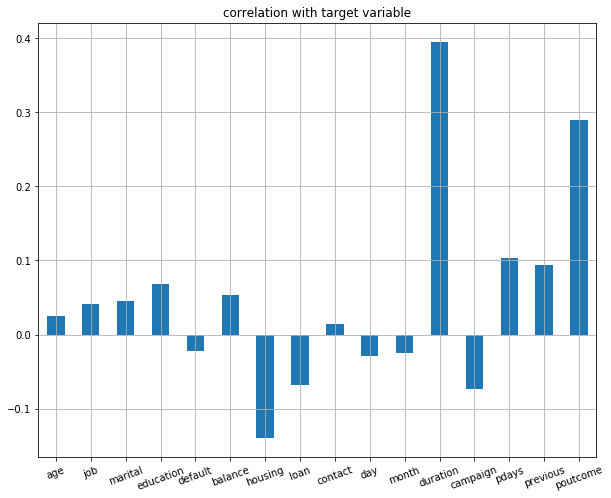

In [44]:
plt.figure(figsize=(10,8))
df.drop('y',axis=1).corrwith(df['y']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable")

In [45]:
# Checking statistical description of dataset 
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.276061,1.167725,1.142664,0.018027,1362.272058,0.555838,0.160226,0.064276,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,0.107540,0.116985
std,10.618762,3.239553,0.608230,0.652218,0.133049,3044.765829,0.496878,0.366820,0.245247,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.403511,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,0.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,95.000000,10.000000,2.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,2.000000,1.000000


Observation : Age Maximum = 4.56 and minimum = 2.62
              Job Maximum = 10 and minimum = 0
              Marital Maximum = 2 and minimum = 0
              Education Maximum = 2 and minimum = 0
              balance Maximum = 46.74 and minimum = -20.01
              housing Maximum = 1 and minimum = 0
              loan Maximum = 1 and minimum = 0
              contact Maximum = 1 and minimum = 0
              day Maximum = 31 and minimum = 1
              month Maximum = 11 and minimum = 0
              duration Maximum = 17 and minimum = 17
              campaign Maximum = 3.97 and minimum = 1
              pdays Maximum = 9.55 and minimum = -1
              previous Maximum = 6.50 and minimum = 0
              y Maximum = 1 and minimum = 0
   
   Outliers present in some columns and skewness also present in some columns.
            

In [46]:
# Checking Statistical description
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.034420,-0.403240,-0.164888,-0.017879,0.097783,-0.185513,-0.015655,0.170349,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.020402,0.025155
job,-0.034420,1.000000,0.062377,0.184084,-0.005285,0.015769,-0.108219,-0.025496,-0.010252,0.025840,-0.090921,0.006361,0.003448,-0.020931,0.001307,0.023990,0.040786
marital,-0.403240,0.062377,1.000000,0.119220,-0.007023,0.002122,-0.016096,-0.046893,-0.020524,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,0.030059,0.045588
education,-0.164888,0.184084,0.119220,1.000000,-0.011539,0.067184,-0.075157,-0.025282,-0.070190,0.025931,-0.075052,0.002635,0.003703,0.004264,0.025175,0.049114,0.068633
default,-0.017879,-0.005285,-0.007023,-0.011539,1.000000,-0.066745,-0.006025,0.077234,-0.017208,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,-0.027870,-0.022419
balance,0.097783,0.015769,0.002122,0.067184,-0.066745,1.000000,-0.068768,-0.084350,0.037999,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,0.035540,0.052838
housing,-0.185513,-0.108219,-0.016096,-0.075157,-0.006025,-0.068768,1.000000,0.041323,-0.080822,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.061944,-0.139173
loan,-0.015655,-0.025496,-0.046893,-0.025282,0.077234,-0.084350,0.041323,1.000000,-0.013183,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,-0.052306,-0.068185
contact,0.170349,-0.010252,-0.020524,-0.070190,-0.017208,0.037999,-0.080822,-0.013183,1.000000,0.023652,-0.004616,-0.023201,0.053895,0.016006,0.028097,0.020449,0.014042
day,-0.009120,0.025840,-0.005261,0.025931,0.009424,0.004503,-0.027982,0.011370,0.023652,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,-0.043147,-0.028348


# Checking skewness 

In [47]:
df.skew()

age           0.684818
job           0.266523
marital      -0.102826
education    -0.152467
default       7.245375
balance       8.360308
housing      -0.224766
loan          1.852617
contact       3.553497
day           0.093079
month        -0.480272
duration      3.144318
campaign      4.898650
pdays         2.615715
previous     41.846454
poutcome      3.870796
y             2.383480
dtype: float64

In [48]:
import numpy as np
for cols in df.columns:
    if df[cols].skew()>0.55:
        df[cols]=np.cbrt(df[cols])

In [49]:
df.skew()

age          0.286500
job          0.266523
marital     -0.102826
education   -0.152467
default      7.245375
balance     -0.078187
housing     -0.224766
loan         1.852617
contact      3.553497
day          0.093079
month       -0.480272
duration     0.640146
campaign     1.653048
pdays        1.761872
previous     2.056920
poutcome     3.333646
y            2.383480
dtype: float64

In [50]:
df.drop('default',axis=1,inplace=True)   # No use of default feature. Highly unbalanced so, dropping it.

# Removing Outliers by zscore

In [51]:
from scipy.stats import zscore
z=np.abs(zscore(df))    
z

array([[1.54012107, 0.08521676, 0.27576178, ..., 0.4518397 , 0.28090992,
        0.36398261],
       [0.37297702, 1.45822324, 1.3683719 , ..., 0.4518397 , 0.28090992,
        0.36398261],
       [0.73345213, 0.70259276, 0.27576178, ..., 0.4518397 , 0.28090992,
        0.36398261],
       ...,
       [2.53165179, 0.22347124, 0.27576178, ..., 2.17457906, 3.99323018,
        2.74738398],
       [1.46343011, 1.01128076, 0.27576178, ..., 0.4518397 , 0.28090992,
        0.36398261],
       [0.30609177, 0.70259276, 0.27576178, ..., 3.59815494, 3.11147733,
        0.36398261]])

In [52]:
threshold=3               #Identifying outlirs
print(np.where(z>3))

(array([   37,    43,    59, ..., 45209, 45210, 45210], dtype=int64), array([10, 10, 10, ...,  7, 13, 14], dtype=int64))


In [53]:
df1=df[(z<3).all(axis=1)]   #Removing outliers
df1

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3.870877,4,1,2,12.892606,1,0.0,0.0,5,8,6.390677,1.000000,-1.0,0.0,0.0,0.0
1,3.530348,9,2,1,3.072317,1,0.0,0.0,5,8,5.325074,1.000000,-1.0,0.0,0.0,0.0
2,3.207534,2,1,1,1.259921,1,1.0,0.0,5,8,4.235824,1.000000,-1.0,0.0,0.0,0.0
3,3.608826,1,1,1,11.462385,1,0.0,0.0,5,8,4.514357,1.000000,-1.0,0.0,0.0,0.0
4,3.207534,1,2,1,1.000000,0,0.0,0.0,5,8,5.828477,1.000000,-1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,3.239612,0,2,1,8.227825,0,0.0,0.0,17,9,6.073178,1.000000,-1.0,0.0,0.0,1.0
45203,2.843867,8,2,2,4.834588,0,0.0,0.0,17,9,6.431228,1.000000,-1.0,0.0,0.0,1.0
45205,2.924018,9,2,1,7.963374,0,1.0,0.0,17,9,7.281079,1.259921,-1.0,0.0,0.0,1.0
45206,3.708430,9,1,2,9.378887,0,0.0,0.0,17,9,9.922738,1.442250,-1.0,0.0,0.0,1.0


# Splitting x and y variables

In [54]:
x= df1.drop(['y'],axis=1)

In [55]:
x.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,3.870877,4,1,2,12.892606,1,0.0,0.0,5,8,6.390677,1.0,-1.0,0.0,0.0
1,3.530348,9,2,1,3.072317,1,0.0,0.0,5,8,5.325074,1.0,-1.0,0.0,0.0
2,3.207534,2,1,1,1.259921,1,1.0,0.0,5,8,4.235824,1.0,-1.0,0.0,0.0
3,3.608826,1,1,1,11.462385,1,0.0,0.0,5,8,4.514357,1.0,-1.0,0.0,0.0
4,3.207534,1,2,1,1.000000,0,0.0,0.0,5,8,5.828477,1.0,-1.0,0.0,0.0


In [56]:
y=df1["y"]
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
45202    1.0
45203    1.0
45205    1.0
45206    1.0
45207    1.0
Name: y, Length: 37644, dtype: float64

In [57]:
df1['y']=df['y'].astype(int)

In [58]:
x.shape           # Checking shape of x

(37644, 15)

In [59]:
y.shape          # Checking shape of y

(37644,)

# Scaling data by StandardScaler

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.65610149, -0.08089296, -0.27162753, ..., -0.34892427,
        -0.34547196,  0.        ],
       [ 0.43429627,  1.455037  ,  1.36754317, ..., -0.34892427,
        -0.34547196,  0.        ],
       [-0.72395059, -0.69526495, -0.27162753, ..., -0.34892427,
        -0.34547196,  0.        ],
       ...,
       [-1.74119951,  1.455037  ,  1.36754317, ..., -0.34892427,
        -0.34547196,  0.        ],
       [ 1.07324705,  1.455037  , -0.27162753, ..., -0.34892427,
        -0.34547196,  0.        ],
       [ 2.624642  ,  0.22629303, -1.91079823, ..., -0.34892427,
        -0.34547196,  0.        ]])

# Building Models

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Splitting data into training and testing data
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)


In [63]:
lr=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
svc=SVC()
knn=KNeighborsClassifier()
xgb=XGBClassifier()
gbr=GradientBoostingClassifier()

In [64]:
models = []
models.append(('LogisticRegression',lr))
models.append(('GaussianNB',gnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('SVC',svc))
models.append(('KNeighborsClassifier',knn))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbr))

In [65]:
Model = []
score = []

for name,model in models:
    print("**********",name,'**************')
    print('\n')
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    r2_scr=r2_score(y_test,pre)
    #print("r2_score corresponding to random state is" ,r2_scr)
    print('\n')
    print(accuracy_score(y_test,pre))
    print(confusion_matrix(y_test,pre))
    print(classification_report(y_test,pre))

********** LogisticRegression **************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


0.9102873702004347
[[7393  134]
 [ 609  146]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7527
         1.0       0.52      0.19      0.28       755

    accuracy                           0.91      8282
   macro avg       0.72      0.59      0.62      8282
weighted avg       0.89      0.91      0.89      8282

********** GaussianNB **************


GaussianNB(priors=None, var_smoothing=1e-09)


0.9034049746438059
[[7270  257]
 [ 543  212]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      7527
         1.

In [73]:
from sklearn.model_selection import cross_val_score
for name,model in models:
    print("**********",name,'**************')
    print("\n")
    scores = cross_val_score(model,x_train,y_train,cv=10,scoring="accuracy")
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

********** LogisticRegression **************


Scores: [0.90806946 0.90909091 0.91689373 0.91280654 0.91076294 0.91110354
 0.91348774 0.91450954 0.91621253 0.90803815]
Mean: 0.9120975081618624
Standard Deviation: 0.0030447138483877976
********** GaussianNB **************


Scores: [0.89717399 0.89955737 0.90667575 0.90395095 0.89611717 0.89407357
 0.90667575 0.90020436 0.90837875 0.90122616]
Mean: 0.9014033810845188
Standard Deviation: 0.004638710760174279
********** DecisionTreeClassifier **************


Scores: [0.88014981 0.87572353 0.88589918 0.89373297 0.88555858 0.88726158
 0.88623978 0.87942779 0.88385559 0.8777248 ]
Mean: 0.8835573612622568
Standard Deviation: 0.0050802567273742025
********** RandomForestClassifier **************


Scores: [0.90875043 0.91317671 0.91859673 0.91723433 0.91348774 0.91348774
 0.91723433 0.91348774 0.92098093 0.91416894]
Mean: 0.915060561064832
Standard Deviation: 0.003295281313568987
********** SVC **************


Scores: [0.90977188 0.91045284 

In [74]:
from sklearn.externals import joblib   # saving model
joblib.dump(model,'xgb_bankmarketing.obj')

['xgb_bankmarketing.obj']

CONCLUSION : The goal of project is to recognize whether specific client will subscribe to a bank deposit.
           The meaning of the features is essential to have view how the feature impact on the data.
           Cleaning data,I have decided to replace the 'unknown' data.For this dataset preprocessing and feature understanding
           is the most important step.
           Duration, poutcome, pdays, previous, education having major impact on target variable and balance, job, marital, age 
           having less impact. The problem is logistic regression so building all models of classificaton and cross-validation            technique and compare score of all models. XGBoost Classifier having good accuracy score with 91.79% so, I have saved model with xgb. 
            